In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from pycaret.datasets import get_data

In [2]:
data = get_data('bank-additional-full')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
s = setup(data, target = "y", session_id = 123)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(41188, 21)"
5,Transformed data shape,"(41188, 63)"
6,Transformed train set shape,"(28831, 63)"
7,Transformed test set shape,"(12357, 63)"
8,Numeric features,10
9,Categorical features,10


In [4]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()
# init setup on exp
exp.setup(data, target = 'y', session_id = 123)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(41188, 21)"
5,Transformed data shape,"(41188, 63)"
6,Transformed train set shape,"(28831, 63)"
7,Transformed test set shape,"(12357, 63)"
8,Numeric features,10
9,Categorical features,10


In [5]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9161,0.9494,0.9161,0.9111,0.9130,0.5500,0.5526,0.2690
gbc,Gradient Boosting Classifier,0.9156,0.9464,0.9156,0.9091,0.9113,0.5359,0.5406,0.6370
catboost,CatBoost Classifier,0.9152,0.9487,0.9152,0.9096,0.9116,0.5412,0.5444,3.3260
rf,Random Forest Classifier,0.9123,0.9388,0.9123,0.9025,0.9046,0.4886,0.5004,0.4780
xgboost,Extreme Gradient Boosting,0.9113,0.9445,0.9113,0.9062,0.9082,0.5261,0.5285,0.2220
lr,Logistic Regression,0.9100,0.9320,0.9100,0.8988,0.9007,0.4620,0.4776,1.9360
ada,Ada Boost Classifier,0.9095,0.9363,0.9095,0.8978,0.8997,0.4549,0.4716,0.4170
lda,Linear Discriminant Analysis,0.9090,0.9331,0.9090,0.9024,0.9049,0.5048,0.5083,0.2230
ridge,Ridge Classifier,0.9070,0.9331,0.9070,0.8931,0.8920,0.3975,0.4300,0.1660
knn,K Neighbors Classifier,0.9025,0.8725,0.9025,0.8954,0.8982,0.4706,0.4738,0.6290


In [6]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9161,0.9494,0.9161,0.9111,0.9130,0.5500,0.5526,0.2790
gbc,Gradient Boosting Classifier,0.9156,0.9464,0.9156,0.9091,0.9113,0.5359,0.5406,0.6450
catboost,CatBoost Classifier,0.9152,0.9487,0.9152,0.9096,0.9116,0.5412,0.5444,3.2650
rf,Random Forest Classifier,0.9123,0.9388,0.9123,0.9025,0.9046,0.4886,0.5004,0.4910
xgboost,Extreme Gradient Boosting,0.9113,0.9445,0.9113,0.9062,0.9082,0.5261,0.5285,0.2270
lr,Logistic Regression,0.9100,0.9320,0.9100,0.8988,0.9007,0.4620,0.4776,1.4460
ada,Ada Boost Classifier,0.9095,0.9363,0.9095,0.8978,0.8997,0.4549,0.4716,0.4250
lda,Linear Discriminant Analysis,0.9090,0.9331,0.9090,0.9024,0.9049,0.5048,0.5083,0.2250
ridge,Ridge Classifier,0.9070,0.9331,0.9070,0.8931,0.8920,0.3975,0.4300,0.1650
knn,K Neighbors Classifier,0.9025,0.8725,0.9025,0.8954,0.8982,0.4706,0.4738,0.2890


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

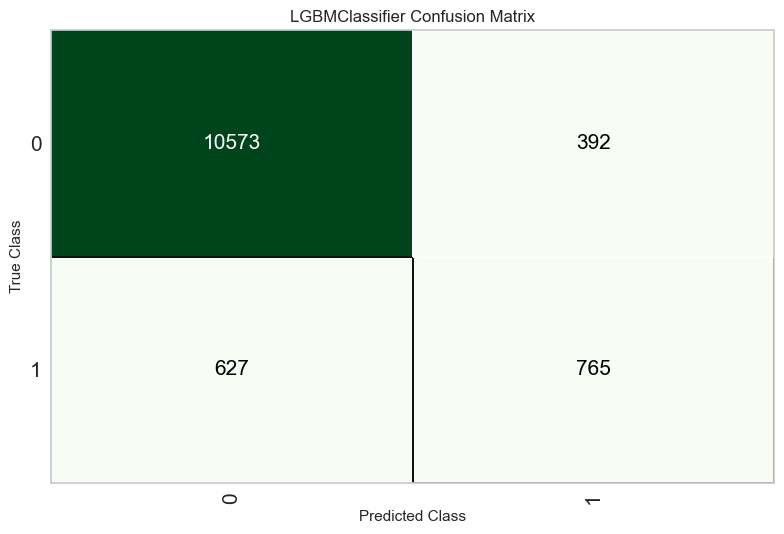

In [7]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

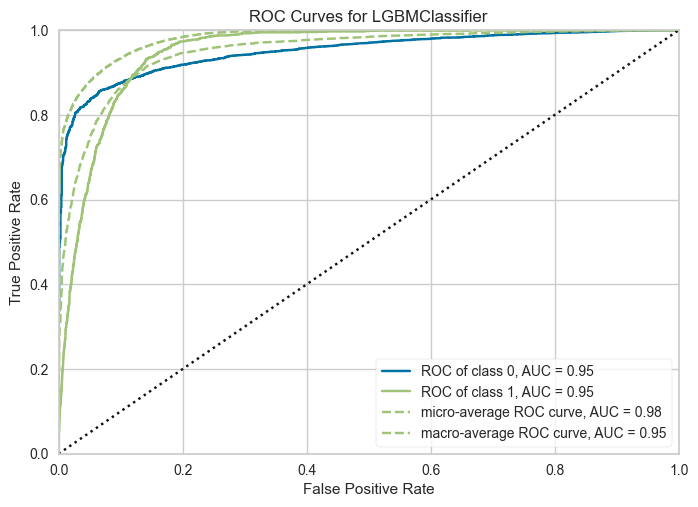

In [8]:
# plot AUC
plot_model(best, plot = 'auc')

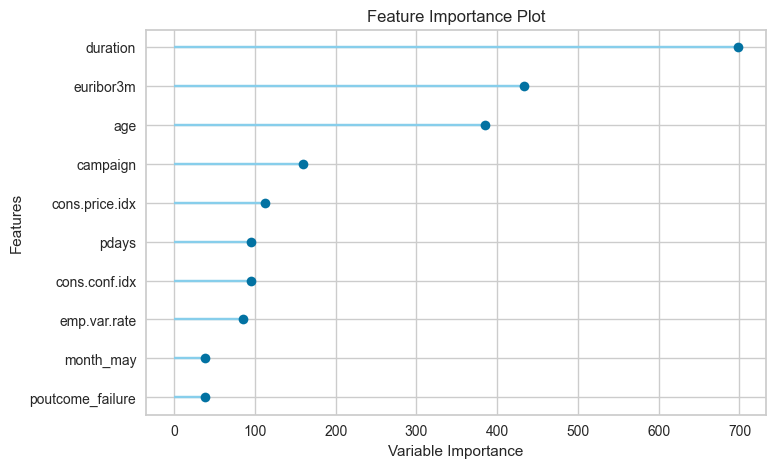

In [9]:
# plot feature importance
plot_model(best, plot = 'feature')

In [10]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [11]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9175,0.9499,0.9175,0.9122,0.9142,0.5547,0.5576


In [12]:
# show predictions df
holdout_pred.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,prediction_label,prediction_score
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,1,failure,-2.9,92.200996,-31.400000,0.869,5076.200195,yes,yes,0.6360
3357,25,blue-collar,single,basic.9y,unknown,yes,no,telephone,may,thu,...,0,nonexistent,1.1,93.994003,-36.400002,4.860,5191.000000,no,no,0.9993
22463,29,admin.,single,university.degree,no,yes,yes,cellular,aug,fri,...,0,nonexistent,1.4,93.444000,-36.099998,4.964,5228.100098,no,no,0.9999
15890,29,admin.,single,university.degree,no,no,yes,telephone,jul,mon,...,0,nonexistent,1.4,93.917999,-42.700001,4.960,5228.100098,yes,yes,0.5320
11725,33,admin.,married,professional.course,no,no,no,telephone,jun,fri,...,0,nonexistent,1.4,94.464996,-41.799999,4.959,5228.100098,no,no,0.9997


In [13]:
#reprint original data for comparison
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('y', axis=1, inplace=True)
new_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [15]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,prediction_label,prediction_score
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994003,-36.400002,4.857,5191.0,no,0.9993
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994003,-36.400002,4.857,5191.0,no,0.9994
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994003,-36.400002,4.857,5191.0,no,0.9991
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994003,-36.400002,4.857,5191.0,no,0.9997
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994003,-36.400002,4.857,5191.0,no,0.9983
